<a href="https://colab.research.google.com/github/rithik6/heart-attack-risk-prediction/blob/main/HEART_ATTACK_RISK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING ESSENTIAL LIBRARIES**

In [5]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing, Evaluation
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score,precision_recall_curve,auc,roc_curve,log_loss,average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


# Statistical
from scipy.stats import chi2_contingency,skew

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Model saving/loading
import joblib
import os

# **LOADING DATASET**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/sem8/heart_attack_risk_dataset.csv')
df.shape

(50000, 20)

# **EXPLORATORY DATA ANALYSIS & VISUALIZATION**

In [8]:
# Display Dataset
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [9]:
# Initial Inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [10]:
# Summary Statistics
df.describe()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


**Listing Unique Value Counts**

In [11]:
print(df.nunique())

Age                          72
Gender                        2
Smoking                       2
Alcohol_Consumption           2
Physical_Activity_Level       3
BMI                        2501
Diabetes                      2
Hypertension                  2
Cholesterol_Level          1501
Resting_BP                   90
Heart_Rate                   70
Family_History                2
Stress_Level                  3
Chest_Pain_Type               4
Thalassemia                   3
Fasting_Blood_Sugar           2
ECG_Results                   3
Exercise_Induced_Angina       2
Max_Heart_Rate_Achieved     100
Heart_Attack_Risk             3
dtype: int64


**Check Missing Values**

In [12]:
print(df.isnull().sum())

Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64


**Check Duplicate Rows and Columns**

In [13]:
duplicate_rows = df.duplicated()
print(f"Duplicate rows: {duplicate_rows.sum()}")

duplicate_columns = df.T.duplicated()
print(f"Duplicate columns: {duplicate_columns.sum()}")

Duplicate rows: 0
Duplicate columns: 0


**Listing Categorical and Numerical Features**

In [14]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features:", categorical_features)
print()
print("Numerical Features:", numerical_features)

Categorical Features: Index(['Gender', 'Physical_Activity_Level', 'Stress_Level', 'Chest_Pain_Type',
       'Thalassemia', 'ECG_Results', 'Heart_Attack_Risk'],
      dtype='object')

Numerical Features: Index(['Age', 'Smoking', 'Alcohol_Consumption', 'BMI', 'Diabetes',
       'Hypertension', 'Cholesterol_Level', 'Resting_BP', 'Heart_Rate',
       'Family_History', 'Fasting_Blood_Sugar', 'Exercise_Induced_Angina',
       'Max_Heart_Rate_Achieved'],
      dtype='object')


**Target and Feature Setup**

In [15]:
target_col = 'Heart_Attack_Risk'
features = [col for col in df.columns if col != target_col]

print("Target Column:", target_col)
print("Features:", features)

Target Column: Heart_Attack_Risk
Features: ['Age', 'Gender', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension', 'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History', 'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar', 'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved']


**Outlier Analysis**

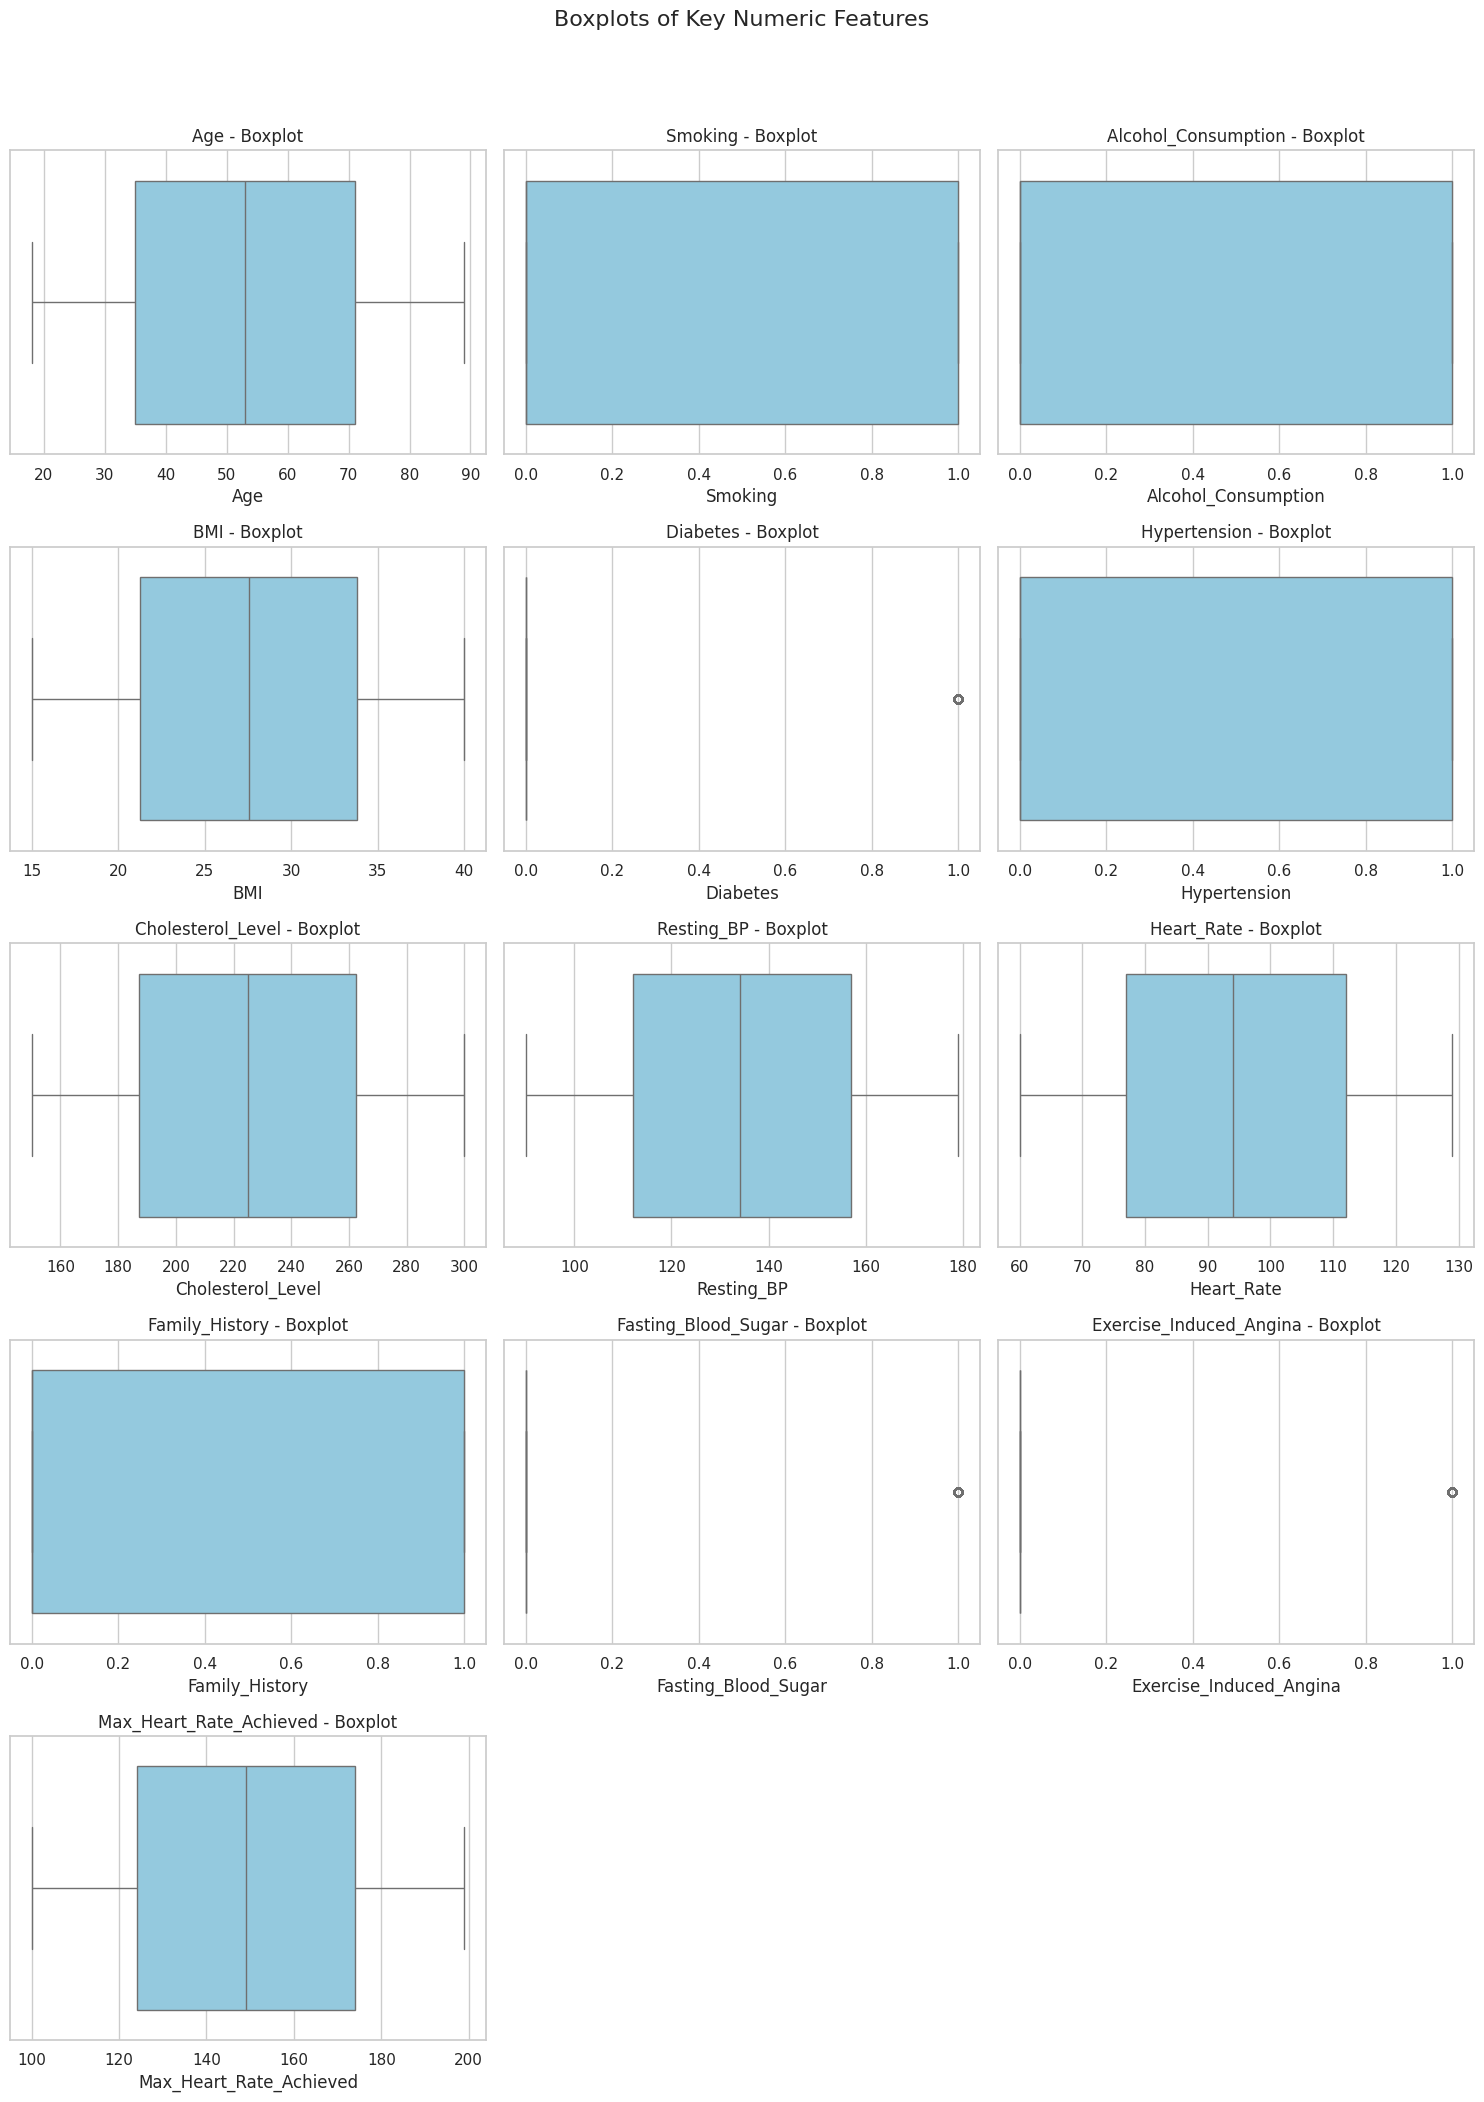

In [16]:
# Box Plot Analysis

sns.set(style="whitegrid")

# Calculate the number of numerical features
num_features_count = len(numerical_features)

# Determine the number of rows and columns for subplots
# Aim for a layout that fits the number of features
# Example: 3 columns, and calculate rows needed
n_cols = 3
n_rows = (num_features_count + n_cols - 1) // n_cols # Calculate rows needed

# Plot setup
plt.figure(figsize=(15, n_rows * 4)) # Adjust figure size based on number of rows
for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i) # Use dynamic number of rows and columns
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'{col} - Boxplot')
    plt.tight_layout()

plt.suptitle('Boxplots of Key Numeric Features', fontsize=16, y=1.05)
plt.show()

In [17]:
# Unique values in categorical features
for col in categorical_features:
    print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Male']
Physical_Activity_Level: ['Moderate' 'Low' 'High']
Stress_Level: ['Moderate' 'Low' 'High']
Chest_Pain_Type: ['Non-anginal' 'Asymptomatic' 'Typical' 'Atypical']
Thalassemia: ['Reversible defect' 'Normal' 'Fixed defect']
ECG_Results: ['Normal' 'ST-T abnormality' 'Left Ventricular Hypertrophy']
Heart_Attack_Risk: ['Low' 'Moderate' 'High']


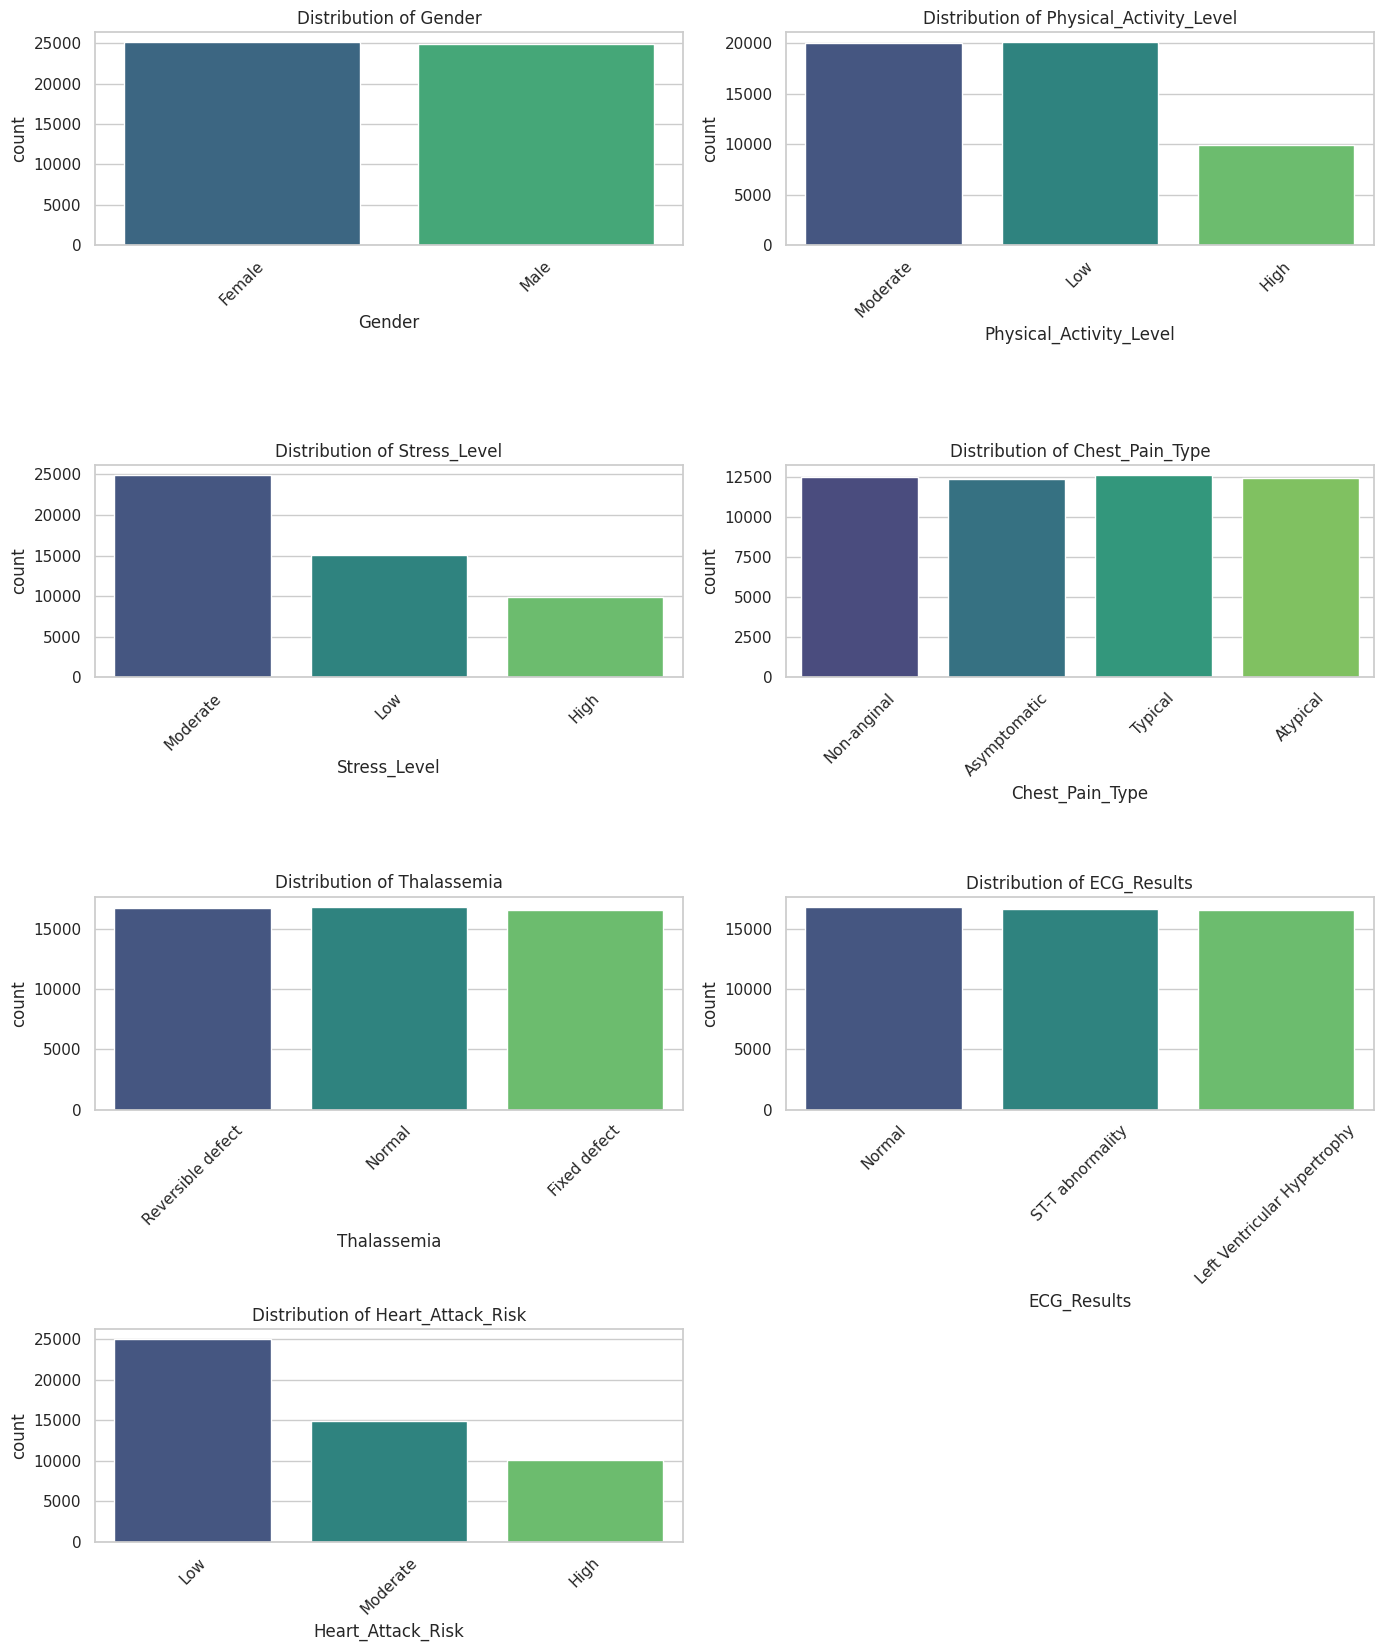

In [18]:
# Univariate Analysis for Categorical Features
plt.figure(figsize=(14, 20))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

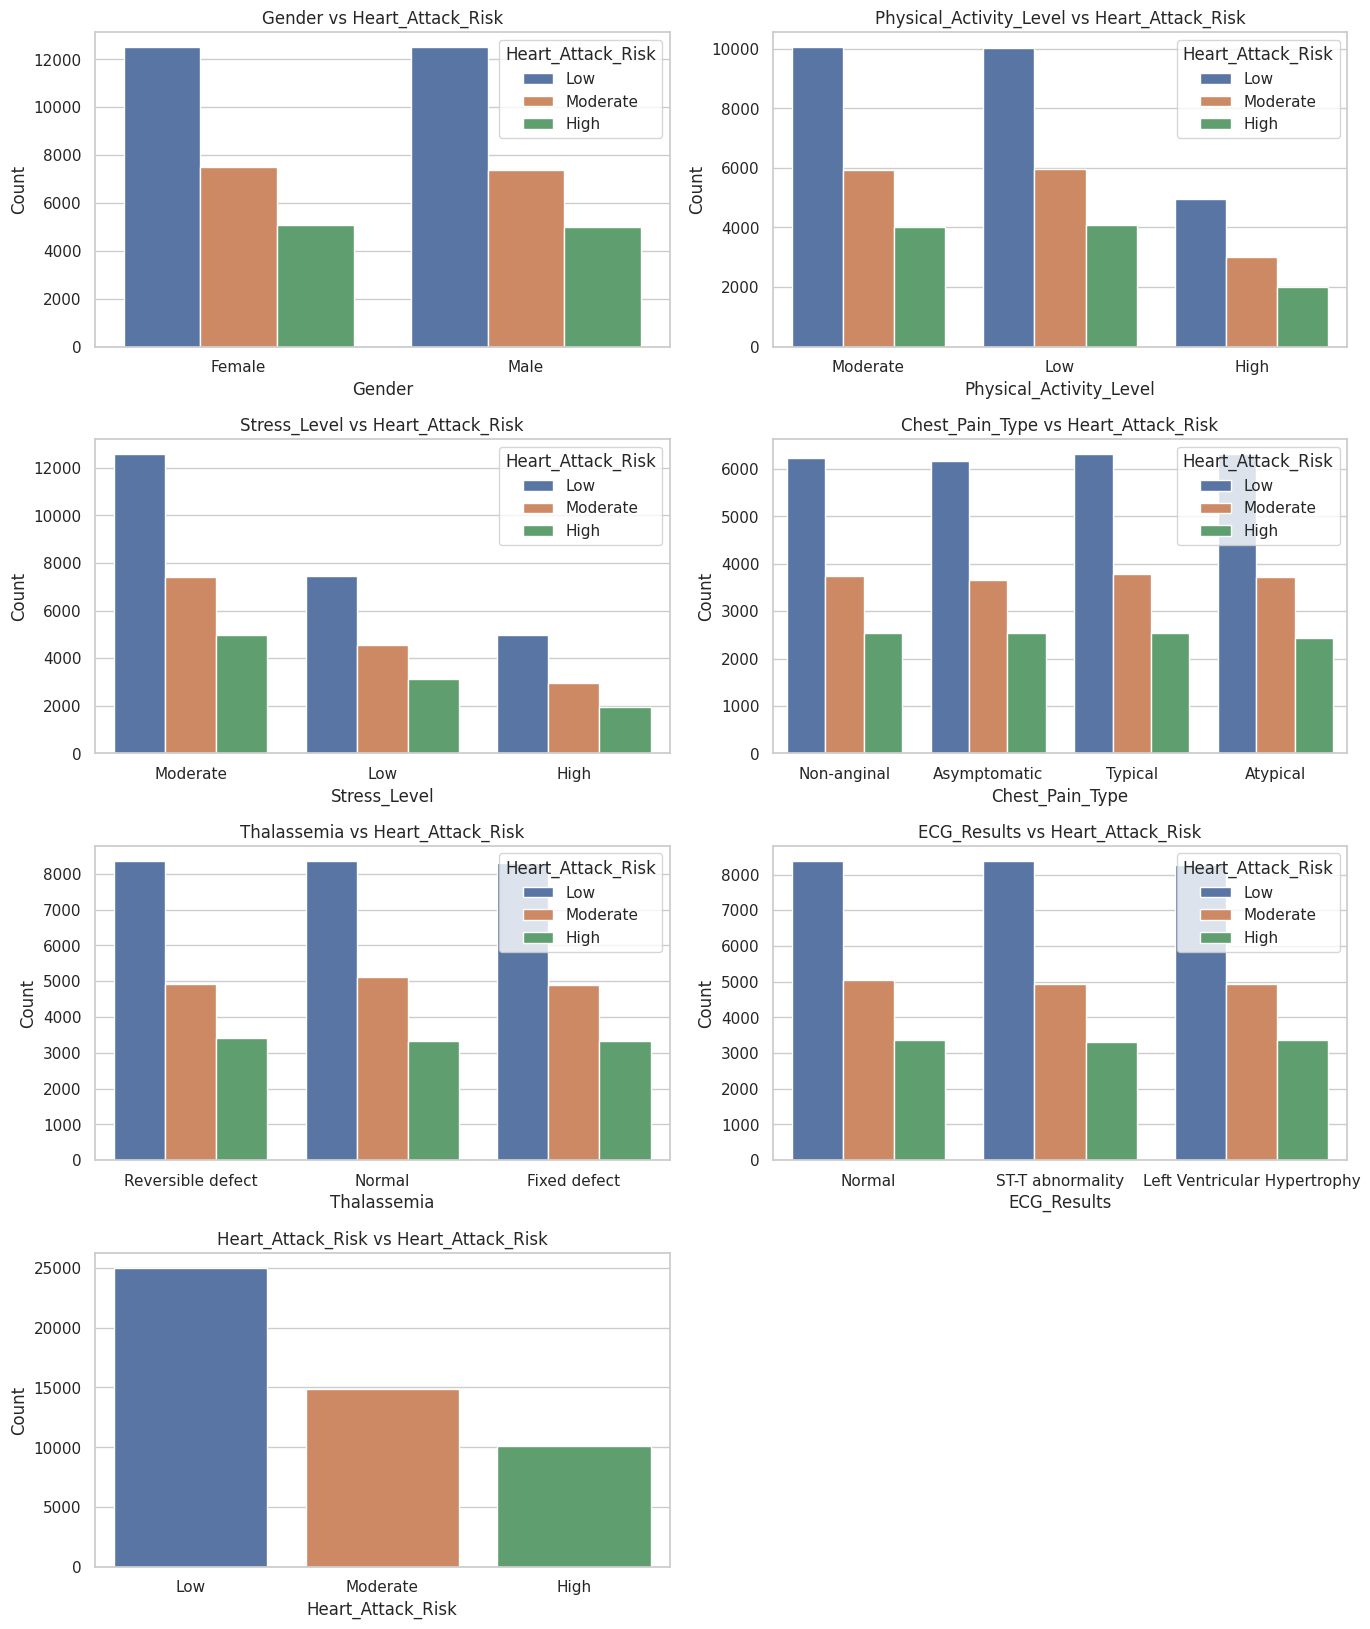

In [19]:
# Bivariate Analysis (Categorical vs. Target)

plt.figure(figsize=(14, 20))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, hue='Heart_Attack_Risk')
    plt.title(f'{col} vs Heart_Attack_Risk')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Statistical Testing: Correlations**

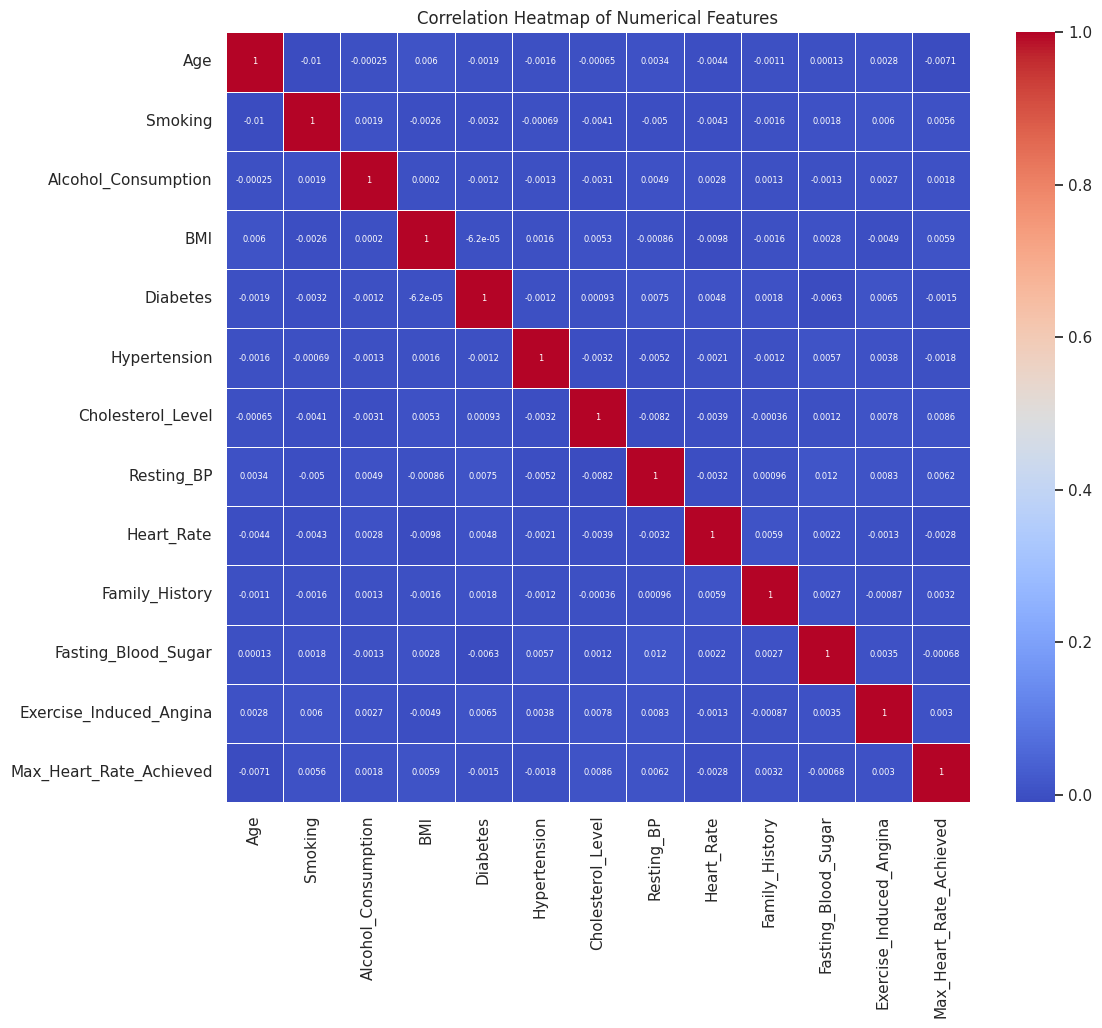

In [20]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.4, annot_kws={"size":6})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Statistical Testing: Chi-Square Test**

In [21]:
significant_features = []
non_significant_features = []

results = []

for col in categorical_features:
    contingency = pd.crosstab(df[col], df['Heart_Attack_Risk'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    results.append({'Feature': col, 'Chi2 Stat': chi2, 'P-Value': p})

    if p < 0.05:
        significant_features.append(col)
    else:
        non_significant_features.append(col)

# Convert to DataFrame
chi_df = pd.DataFrame(results)

# Display
print("============ Chi-Square Test Results ============")
print(chi_df.to_string(index=False))

print("\n✅ Significant Categorical Features (p < 0.05):")
print(significant_features)

print("\n❌ Non-Significant Categorical Features (p >= 0.05):")
print(non_significant_features)

============ Chi-Square Test Results ============
                Feature     Chi2 Stat  P-Value
                 Gender      0.560823 0.755473
Physical_Activity_Level      1.402014 0.843845
           Stress_Level      7.304742 0.120634
        Chest_Pain_Type      5.376350 0.496526
            Thalassemia      5.244481 0.263119
            ECG_Results      1.951936 0.744599
      Heart_Attack_Risk 100000.000000 0.000000

✅ Significant Categorical Features (p < 0.05):
['Heart_Attack_Risk']

❌ Non-Significant Categorical Features (p >= 0.05):
['Gender', 'Physical_Activity_Level', 'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'ECG_Results']


**Dropping Non-Significant Categorical Features**

In [22]:
df.drop(columns=['Gender','Diabetes'], inplace=True)

# Updating Categorical Features
categorical_features = df.select_dtypes(include=['object']).columns

# Updating features
features = [col for col in df.columns if col != target_col]

# **DATA PREPROCESSING**

**Encoding Categorical Features**

In [23]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.5 MB/s eta 0:00:00


In [24]:
# Feature engineering
from category_encoders import TargetEncoder

# 2. BMI Category
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
df['BMI_Category'] = df['BMI'].apply(bmi_category)

# 3. Log Transform Cholesterol
df['Log_Cholesterol'] = np.log(df['Cholesterol_Level'] + 1)

# 4. Stress × Sedentary Interaction (requires encoded Stress_Level)
df['Stress_Level_encoded'] = df['Stress_Level'].replace({'Low': 0, 'Moderate': 1, 'High': 2})

# 6. Age Group Bucketing
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle_Aged'
    elif age < 70:
        return 'Senior'
    else:
        return 'Elderly'
df['Age_Group'] = df['Age'].apply(age_group)

# 8. Feature Interactions
df['Age_Stress'] = df['Age'] * df['Stress_Level_encoded']
df['Chol_BMI'] = df['Cholesterol_Level'] * df['BMI']


In [25]:
le_target = LabelEncoder()
# Apply Label Encoding to the target variable Heart_Attack_Risk
df['Heart_Attack_Risk'] = le_target.fit_transform(df['Heart_Attack_Risk'])

# Get current object columns after the first label encoding
categorical_cols_to_onehot = df.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the remaining categorical columns
# Using the identified list ensures we only try to encode columns that exist and are of object type
df = pd.get_dummies(df, columns=categorical_cols_to_onehot, drop_first=True)


**Handle Class Imbalance to reduce medical biases**

In [26]:
X = df.drop(columns=['Heart_Attack_Risk'])
y = df['Heart_Attack_Risk']

feature_names = X.columns.tolist()

smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

# Use y_resampled for stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42
)

# standardize
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **CORRELATION ANALYSIS**

**Correlation With Heart Attack Risk**

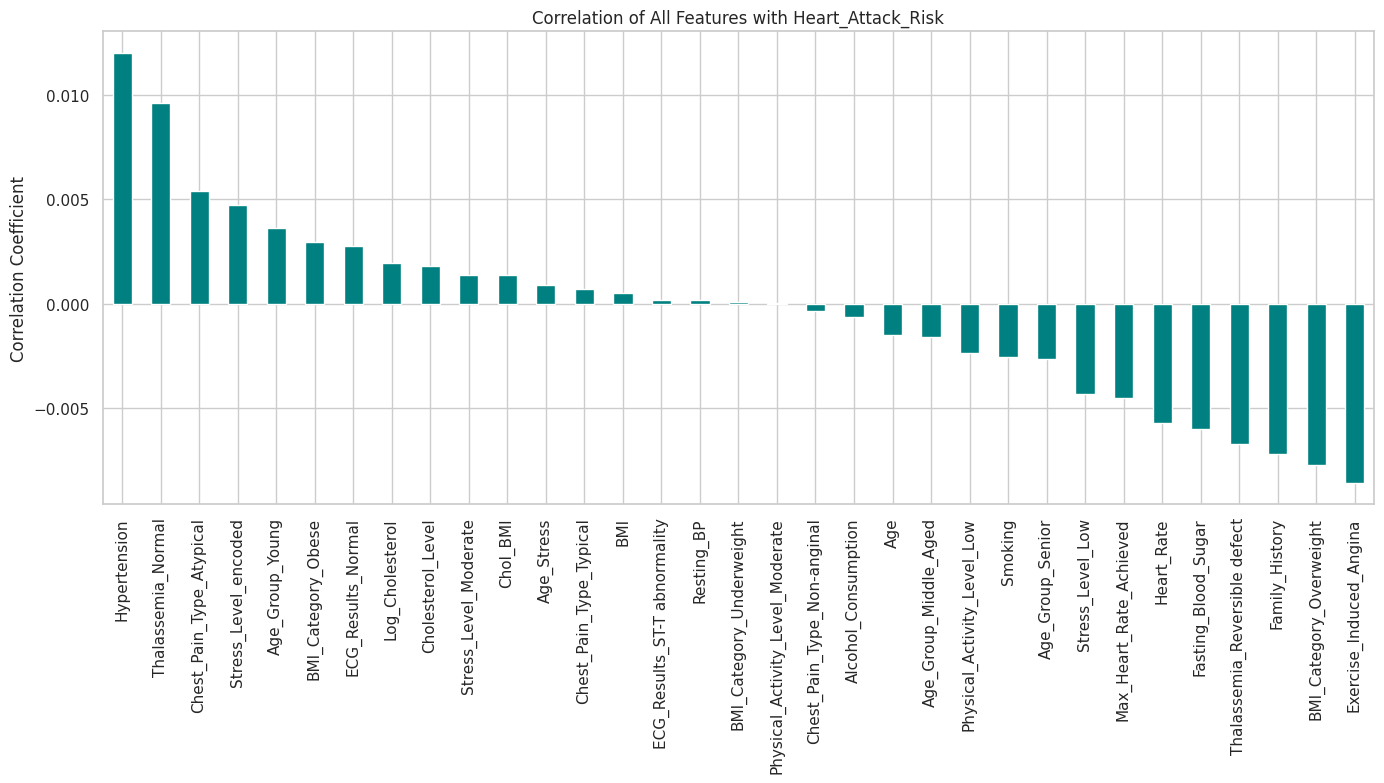

In [27]:
cor_target = df.corr()['Heart_Attack_Risk'].sort_values(ascending=False)
cor_target = cor_target.drop('Heart_Attack_Risk') # Dropped Target

# Plot the correlation
plt.figure(figsize=(14, 8))
cor_target.plot(kind='bar', color='teal')

# Plot settings
plt.title('Correlation of All Features with Heart_Attack_Risk')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

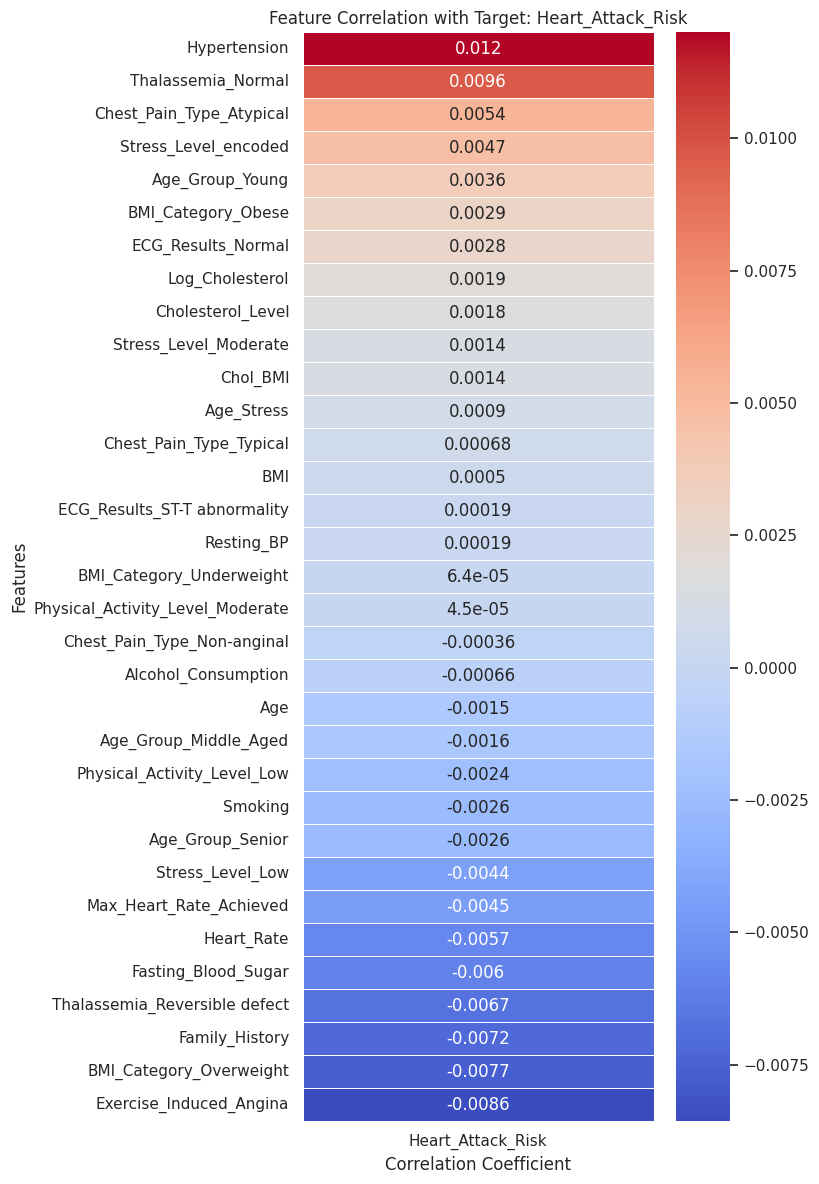

In [28]:
# Heat Map of Correlation with Target

target_col = 'Heart_Attack_Risk'

# Compute correlation matrix with the target
correlation_with_target = df.corr()[[target_col]].sort_values(by=target_col, ascending=False)

# Drop the target itself
correlation_with_target = correlation_with_target.drop(index=target_col)

# Plot heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title(f'Feature Correlation with Target: {target_col}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# **MACHINE LEARNING: TRAIN MODELS**

In [29]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGB": XGBClassifier(n_estimators=300,learning_rate=0.1,max_depth=5,subsample=0.8,colsample_bytree=0.8,random_state=42)
    #"SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))




Logistic Regression Results:
Accuracy: 0.4863
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      5005
           1       0.50      0.73      0.59      5005
           2       0.33      0.17      0.22      5005

    accuracy                           0.49     15015
   macro avg       0.46      0.49      0.46     15015
weighted avg       0.46      0.49      0.46     15015


Random Forest Results:
Accuracy: 0.5669
              precision    recall  f1-score   support

           0       0.67      0.59      0.63      5005
           1       0.52      0.80      0.63      5005
           2       0.55      0.31      0.40      5005

    accuracy                           0.57     15015
   macro avg       0.58      0.57      0.55     15015
weighted avg       0.58      0.57      0.55     15015


Decision Tree Results:
Accuracy: 0.4424
              precision    recall  f1-score   support

           0       0.47      0.49      0.48      5005


**Results**

In [30]:
res_df = pd.DataFrame(results, columns=["Model", "Accuracy"])

# Sort results by accuracy
res_df = res_df.sort_values(by=["Accuracy"], ascending=[False])

# Display the sorted results
res_df

,Model,Accuracy
1,Random Forest,0.566900
4,XGB,0.535265
3,K-Nearest Neighbors,0.487313
0,Logistic Regression,0.486314
2,Decision Tree,0.442358


**Visualization of Model Results**

# **BEST MODEL**

In [31]:
# Best model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_rf))

joblib.dump(rf_model, "heart_attack_model.pkl")
joblib.dump(feature_names, "model_features.pkl")
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_target, 'label_encoder.pkl')

Accuracy: 0.5669
              precision    recall  f1-score   support

           0       0.67      0.59      0.63      5005
           1       0.52      0.80      0.63      5005
           2       0.55      0.31      0.40      5005

    accuracy                           0.57     15015
   macro avg       0.58      0.57      0.55     15015
weighted avg       0.58      0.57      0.55     15015



['label_encoder.pkl']

**Confusion Matrix**

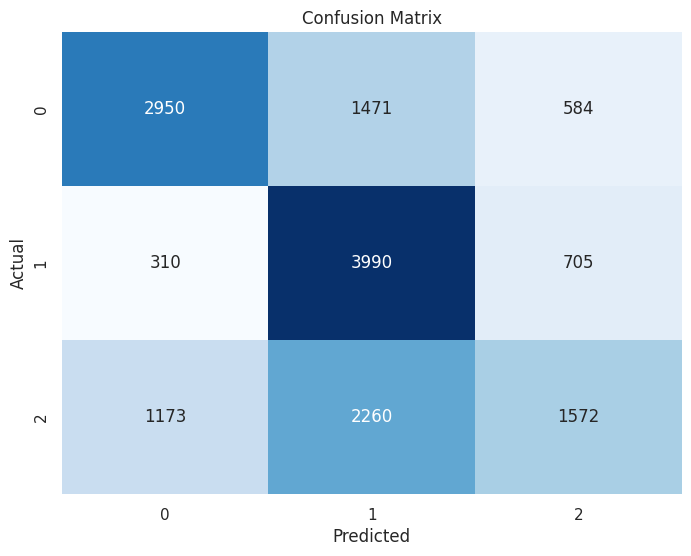

In [32]:
cn = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Feature Importance**

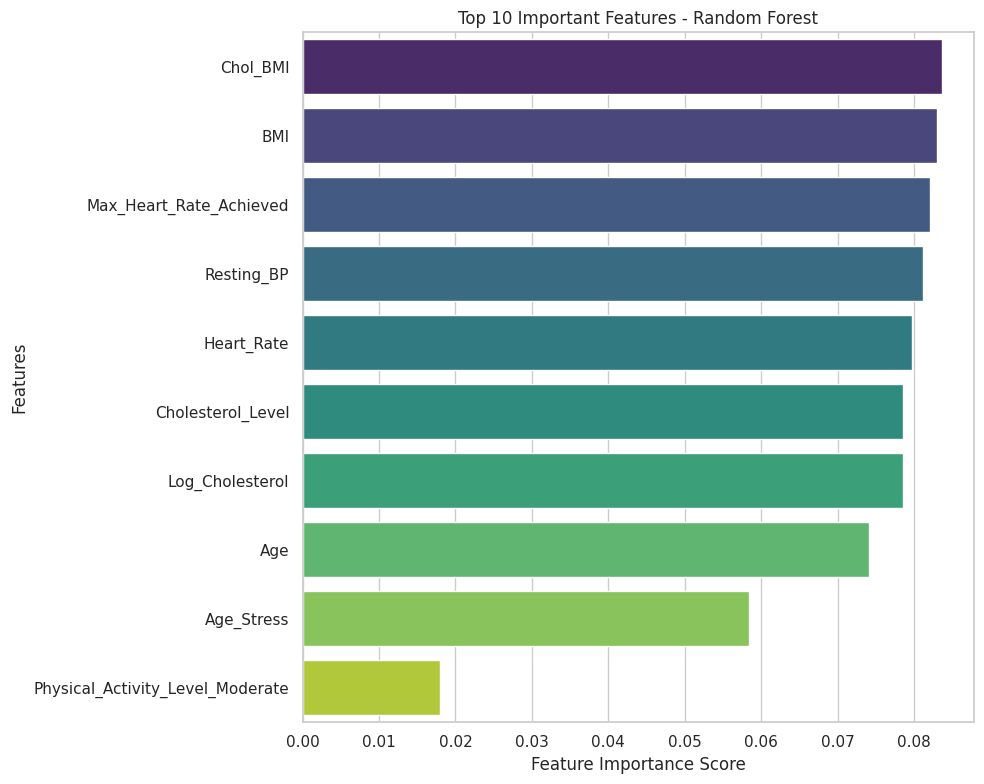

In [33]:
# Get feature importances and feature names
importances = rf_model.feature_importances_

# Get the feature names from original training data (before scaling)
feature_names = X.columns

# Create a DataFrame of features with their importance scores
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ✅ Save top N features for Streamlit input
TOP_N = 10  # Change this number to 15, 20, etc., as needed
top_features = feat_imp_df.head(TOP_N)['Feature'].tolist()
joblib.dump(top_features, 'model_features_top.pkl')  # Save top N feature names

# 📊 Plot top N features
plt.figure(figsize=(10, 8))
sns.barplot(data=feat_imp_df.head(TOP_N), x='Importance', y='Feature', palette='viridis')
plt.title(f'Top {TOP_N} Important Features - Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [34]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.2 MB/s eta 0:00:00


In [35]:
#joblib.dump(rf_model, "/content/heart_attack_model.pkl")

In [36]:
from google.colab import files
#files.download('heart_attack_model.pkl')
files.download('model_features_top.pkl')
#files.download('scaler.pkl')
#files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
!apt-get install git -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [38]:
!git config --global user.name "rithik6"
!git config --global user.email "richurithik7@gmail.com"

In [41]:
from getpass import getpass
token = getpass('Enter your GitHub token: ')

Enter your GitHub token: ··········


In [42]:
!git clone https://{token}@github.com/rithik6/heart-attack-risk-prediction.git

Cloning into 'heart-attack-risk-prediction'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.
Resolving deltas: 100% (1/1), done.


In [43]:
!mv /content/your_notebook.ipynb /content/heart-attack-risk-prediction/


mv: cannot stat '/content/your_notebook.ipynb': No such file or directory


In [44]:
!mv /content/Heart_Attack_Prediction.ipynb /content/heart-attack-risk-prediction/


mv: cannot stat '/content/Heart_Attack_Prediction.ipynb': No such file or directory
